In [162]:
import os
import random
import torch
import torch.nn as nn
from torchvision import models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from consts import FONT_ALLOWLIST

In [163]:
test_dir = './train_test_images/test'

# Load the test classes and sort them
test_classes = os.listdir(test_dir)
test_classes.sort()

# Load the saved model from disk
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
num_classes = len(test_classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load('font_identifier_model.pth'))

# Define the transformations for the input image
data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3), # Convert images to grayscale with 3 channels
    transforms.RandomCrop((224, 224)), # Resize images to the expected input size of the model
    transforms.ToTensor(), # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
])

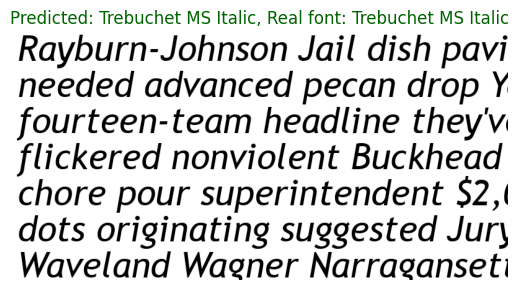

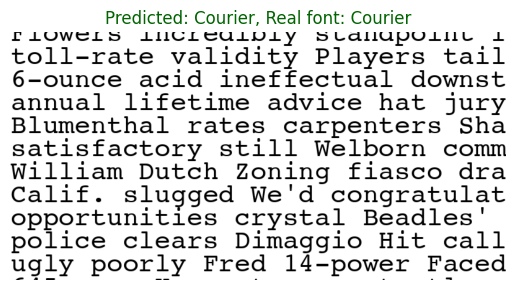

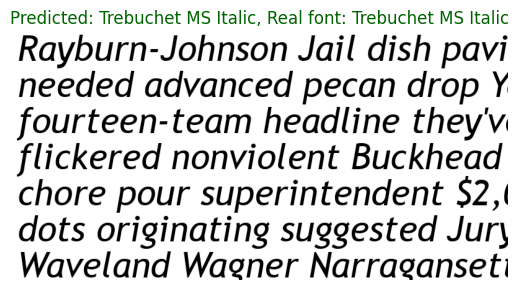

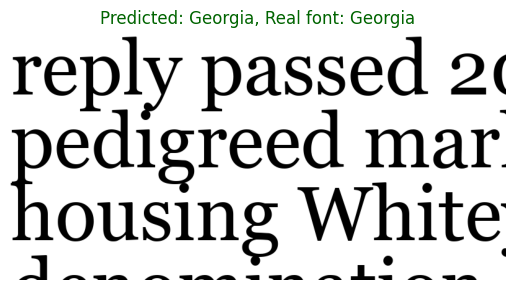

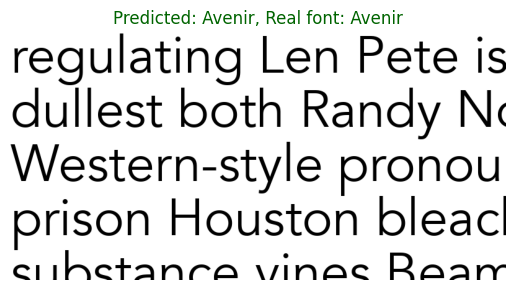

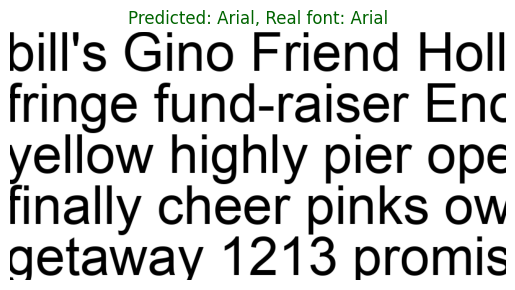

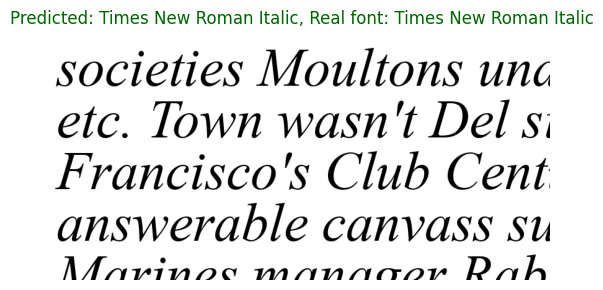

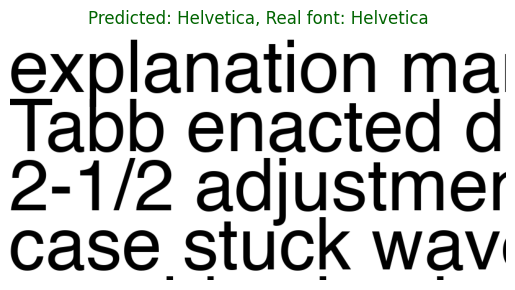

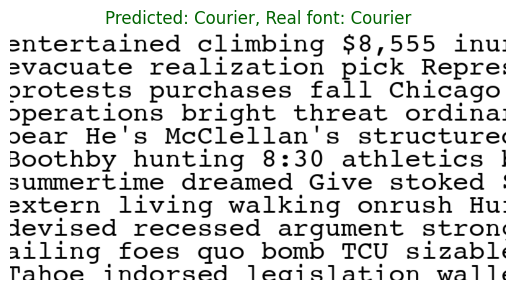

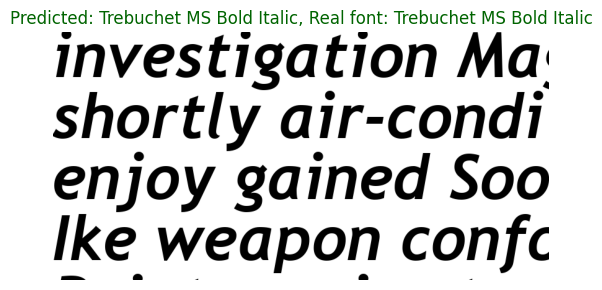

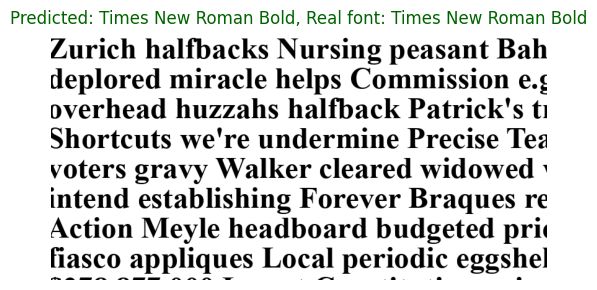

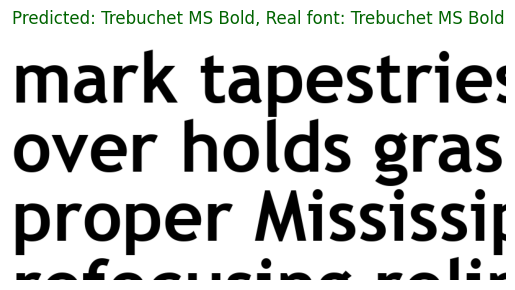

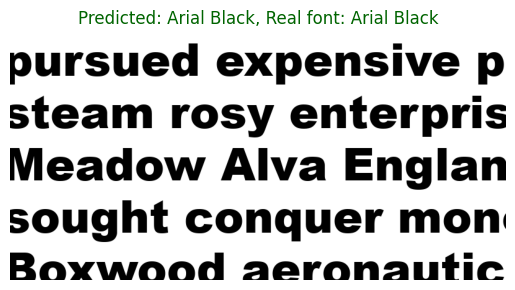

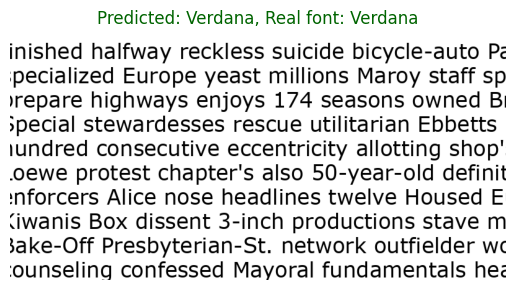

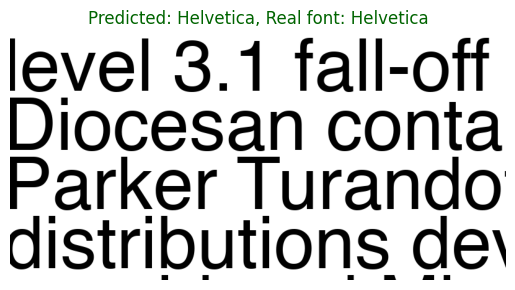

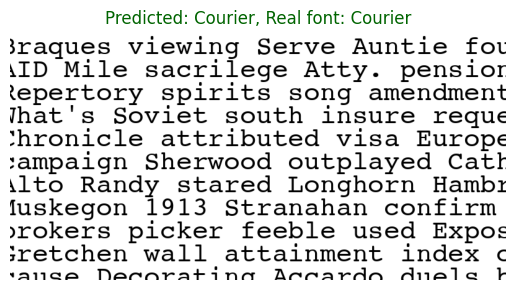

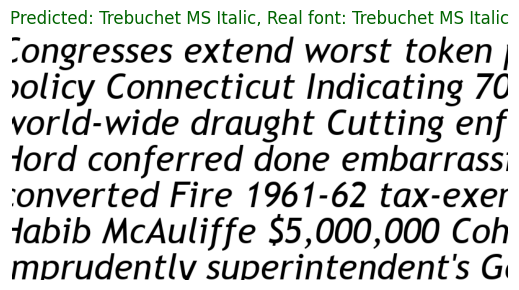

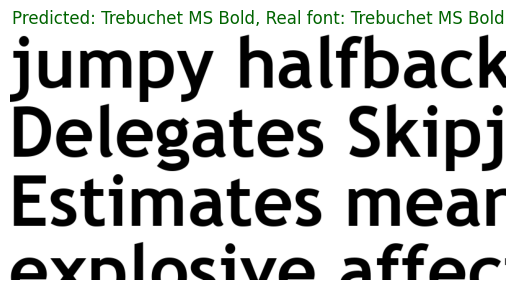

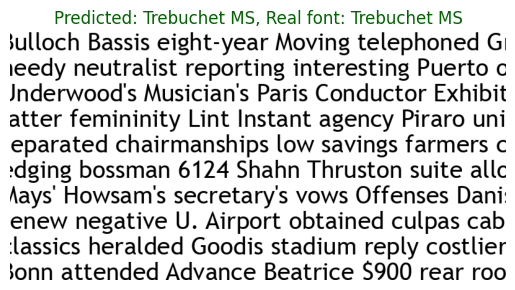

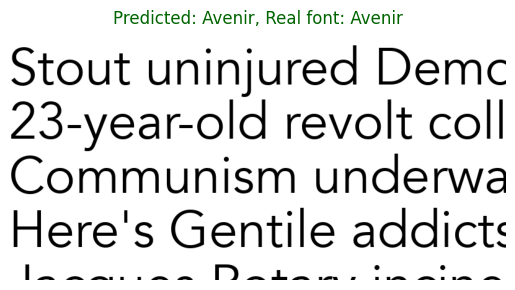

In [164]:


for i in range(20):
    random_class = random.choice(test_classes)
    random_image = random.choice(os.listdir(os.path.join(test_dir, random_class)))
    image_path = os.path.join(test_dir, random_class, random_image)

    # Load the image and apply the transformations
    image = Image.open(image_path)
    image_tensor = data_transforms(image).unsqueeze(0)

    # Classify the image using the trained model
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    # Set the color of the title based on whether the predicted font is correct or not
    if test_classes[predicted.item()] == random_class:
        color = 'darkgreen'
    else:
        color = 'red'

    # Show the image with the predicted and real font names
    plt.imshow(image)
    plt.title(f"Predicted: {test_classes[predicted.item()]}, Real font: {random_class}", color=color)
    plt.axis('off')
    plt.show()
